# HW 4 - Tim Demetriades
## Feature Selection
### Using the top 10 features here.
March 12th, 2021

In [1]:
import pandas as pd                 # for dataframes
import numpy as np                  # for arrays 
import matplotlib.pyplot as plt     # for plots
from sklearn import metrics         # for regression/roc
from sklearn.linear_model import LogisticRegression    # for regression model
from sklearn.feature_selection import RFE              # for rfe feature selection

In [2]:
# Read data
df = pd.read_csv('dataSet_2.csv', header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,914,915,916,917,918,919,920,921,922,923
0,1.85050,0.44413,-0.26072,-0.92156,-0.52009,2.73230,-1.5232,-1.2479,1.4870,-0.52449,...,-0.403160,-0.555010,-0.590640,-0.631990,-0.717270,-0.643510,-0.807630,-0.27966,-0.160250,1
1,2.13930,0.67815,-0.34487,-0.93527,-0.52009,3.08680,-1.5549,-1.2048,1.4753,-0.41132,...,-1.182500,1.527000,0.267590,2.798700,0.147000,2.835500,0.153120,0.80599,0.859200,1
2,2.19670,0.63249,-0.28908,-0.89806,-0.52009,3.08970,-1.5624,-1.1764,1.5184,-0.37138,...,0.258950,-0.537660,1.899500,0.568590,-0.992550,0.192200,-0.031013,0.69062,1.500700,1
3,2.21590,0.68735,-0.31650,-0.90001,-0.52009,3.15650,-1.5627,-1.0686,1.5353,-0.34309,...,1.780200,2.820300,0.268560,-0.150870,0.241210,-0.171270,0.292480,1.05210,-0.389050,1
4,2.26450,0.69541,-0.31650,-0.93331,-0.52009,3.09840,-1.5769,-1.1232,1.4557,-0.32478,...,-0.991740,-0.520880,-0.426940,0.506380,0.355670,-0.004882,-0.669040,0.43659,0.230740,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5917,-0.49460,0.25691,1.60670,1.64210,1.92240,0.24546,1.9545,1.6000,1.6307,2.14820,...,-0.132260,-0.004755,-0.801210,0.042059,-0.406010,0.091662,0.730800,0.45714,0.151720,1
5918,-0.48429,0.29911,1.63510,1.67340,1.92240,0.26870,1.9817,1.6059,1.6307,2.15980,...,1.373600,-0.004755,0.982660,0.094923,1.378600,1.367900,1.516800,-0.14857,0.169040,1
5919,-0.43715,0.28530,1.66250,1.68120,1.92240,0.29775,2.0059,1.6073,1.6424,2.20810,...,-0.898300,-0.004755,-0.693790,1.147100,0.633700,0.520360,-1.208600,0.54000,0.759190,1
5920,-0.47545,0.31983,1.60670,1.71850,1.92240,0.26289,2.0425,1.6059,1.6816,2.20140,...,-0.971120,-0.004755,0.982660,-0.987020,-0.979740,-0.977890,0.984770,-0.87906,-0.865510,1


In [3]:
# Split data by predictor and response
predictor = df.iloc[:, 0:923]
response = df[923]

Each column in predictor is a time series. We will compute the daily change rate using the formula **[X(t)- X(t-1)]/X(t-1)** to generate a new predictor matrix. Note that this will remove the first row of data.

In [4]:
new_predictor = (predictor[1:].to_numpy() - predictor[:5921]) / predictor[:5921]
new_predictor

,0,1,2,3,4,5,6,7,8,9,...,913,914,915,916,917,918,919,920,921,922
0,0.156066,0.526918,0.322760,0.014877,-0.0,0.129744,0.020811,-0.034538,-0.007868,-0.215772,...,-3.443194,1.933079,-3.751302,-1.453051,-5.428393,-1.204944,-5.406303,-1.189592,-3.882035,-6.361622
1,0.026831,-0.067330,-0.161771,-0.039785,-0.0,0.000939,0.004823,-0.023572,0.029214,-0.097102,...,-1.326560,-1.218985,-1.352102,6.098546,-0.796838,-7.752041,-0.932217,-1.202540,-0.143141,0.746625
2,0.008740,0.086737,0.094853,0.002171,-0.0,0.021620,0.000192,-0.091635,0.011130,-0.076175,...,-9.176560,5.874686,-6.245508,-0.858615,-1.265341,-1.243021,-1.891103,-10.430884,0.523414,-1.259246
3,0.021932,0.011726,-0.000000,0.037000,-0.0,-0.018406,0.009087,0.051095,-0.051847,-0.053368,...,-1.631403,-1.557095,-1.184690,-2.589738,-4.356400,0.474524,-0.971494,-3.287473,-0.585030,-1.593086
4,-0.021462,-0.035303,0.176272,0.048258,-0.0,-0.015944,0.008942,0.049769,-0.025143,0.030759,...,-0.726210,-2.002561,0.226348,-5.586827,-3.221257,-3.726347,209.658911,-1.110787,-4.197050,-3.602670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5916,-0.017559,0.021348,0.000000,0.004834,0.0,-0.086491,-0.003315,0.006923,-0.013431,-0.002322,...,-1.817945,-0.811276,-0.000000,-1.815348,-1.078885,0.109984,-1.052345,-1.669906,-1.416036,-1.104953
5917,-0.020845,0.164260,0.017676,0.019061,0.0,0.094679,0.013917,0.003688,0.000000,0.005400,...,-2.222577,-11.385604,-0.000000,-2.226470,1.256901,-4.395483,13.923305,1.075534,-1.324999,0.114158
5918,-0.097338,-0.046170,0.016757,0.004661,0.0,0.108113,0.012212,0.000872,0.007175,0.022363,...,-1.708467,-1.653975,-0.000000,-1.706033,11.084532,-0.540331,-0.619592,-1.796809,-4.634650,3.491186
5919,0.087613,0.121030,-0.033564,0.022187,0.0,-0.117078,0.018246,-0.000871,0.023868,-0.003034,...,-2.411499,0.081064,-0.000000,-2.416365,-1.860448,-2.546063,-2.879257,-1.814802,-2.627889,-2.140044


We then add these new values to the respective values in the original predictor matrix (minus the first row).

In [5]:
new_predictor = new_predictor + predictor[1:].to_numpy()
new_predictor

,0,1,2,3,4,5,6,7,8,9,...,913,914,915,916,917,918,919,920,921,922
0,2.295366,1.205068,-0.022110,-0.920393,-0.52009,3.216544,-1.534089,-1.239338,1.467432,-0.627092,...,-2.479574,0.750579,-2.224302,-1.185461,-2.629693,-1.057944,-2.570803,-1.036472,-3.076045,-5.502422
1,2.223531,0.565160,-0.450851,-0.937845,-0.52009,3.090639,-1.557577,-1.199972,1.547614,-0.468482,...,-1.641240,-0.960035,-1.889762,7.998046,-0.228248,-8.744591,-0.740017,-1.233553,0.547479,2.247325
2,2.224640,0.774087,-0.221647,-0.897839,-0.52009,3.178120,-1.562508,-1.160235,1.546430,-0.419265,...,-6.603560,7.654886,-3.425208,-0.590055,-1.416211,-1.001811,-2.062373,-10.138404,1.575514,-1.648296
3,2.286432,0.707136,-0.316500,-0.896310,-0.52009,3.079994,-1.567813,-1.072105,1.403853,-0.378148,...,-3.256003,-2.548835,-1.705570,-3.016678,-3.850020,0.830194,-0.976376,-3.956513,-0.148440,-1.362346
4,2.194438,0.635557,-0.196018,-0.930092,-0.52009,3.033056,-1.582058,-1.129331,1.393957,-0.304011,...,-1.171010,-1.008281,-0.412432,-3.628527,-4.346057,-4.696027,208.630411,-1.036666,-5.592850,-4.203210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5916,-0.512159,0.278258,1.606700,1.646934,1.92240,0.158969,1.951185,1.606923,1.617269,2.145878,...,-1.015525,-0.943536,-0.004755,-2.616558,-1.036826,-0.296026,-0.960683,-0.939106,-0.958896,-0.953233
5917,-0.505135,0.463370,1.652776,1.692461,1.92240,0.363379,1.995617,1.609588,1.630700,2.165200,...,-3.203597,-10.012004,-0.004755,-1.243810,1.351824,-3.016883,15.291205,2.592334,-1.473569,0.283198
5918,-0.534488,0.239130,1.679257,1.685861,1.92240,0.405863,2.018112,1.608172,1.649575,2.230463,...,-1.013447,-2.552275,-0.004755,-2.399823,12.231632,0.093369,-0.099232,-3.005409,-4.094650,4.250376
5919,-0.387837,0.440860,1.573136,1.740687,1.92240,0.145812,2.060746,1.605029,1.705468,2.198366,...,-3.392519,-0.890056,-0.004755,-1.433705,-2.847468,-3.525803,-3.857147,-0.830032,-3.506949,-3.005554


We must now also remove the first row from response.

In [6]:
new_response = response.iloc[1:]

We now create the model.

In [7]:
# Instantiate (create an instance of) the model
logreg = LogisticRegression(solver='liblinear', C=10.0, random_state=0, max_iter=8000)
# Fit the model with the data
logreg.fit(new_predictor, new_response)
# Predict the probability
y_pred_prob = logreg.predict_proba(new_predictor)[::, 1]    # this holds the probabilities for each row

This model took many iterations to converge. This is likely due to having too many features / overfitting which we will try to fix shortly. Let's now plot the model and caluclate the AUC.

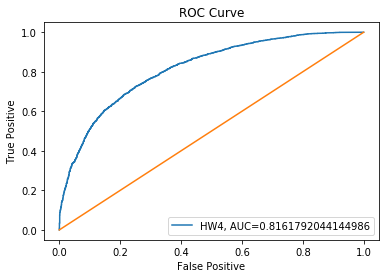

In [8]:
fpr, tpr, _ = metrics.roc_curve(new_response, y_pred_prob)
auc = metrics.roc_auc_score(new_response, y_pred_prob)
plt.plot(fpr, tpr, label='HW4, AUC='+str(auc))
plt.legend(loc=4)

# For drawing a diagonal line y=x for reference
x = [0, 1]
y = [0, 1]
plt.plot(x, y)

plt.title('ROC Curve')
plt.xlabel('False Positive')
plt.ylabel('True Positive')

plt.show()

This model looks pretty solid with a relatively good AUC of 0.816. Let's now split the data into training and testing data to see how well it does.

In [9]:
predictor_train = new_predictor.iloc[0:4500, :]    # first 4500 rows and all columns except last
predictor_test = new_predictor.iloc[4500:, :]      # last 3000 rows and all columns except last
response_train = new_response.iloc[0:4500]       # first 3000 rows and last column
response_test = new_response.iloc[4500:]         # last 3000 rows and last column

In [10]:
# Instantiate (create an instance of) the model (using the default parameters)
logreg_train = LogisticRegression(solver='liblinear', C=10.0, random_state=0, max_iter=8000)
# Fit the model with the data
logreg_train.fit(predictor_train, response_train)
# Predict the probability
y_pred_prob_train = logreg_train.predict_proba(predictor_train)[::, 1]    # this holds the probabilites for each training row
y_pred_prob_test = logreg_train.predict_proba(predictor_test)[::, 1]      # using same model get probabilities for each testing row

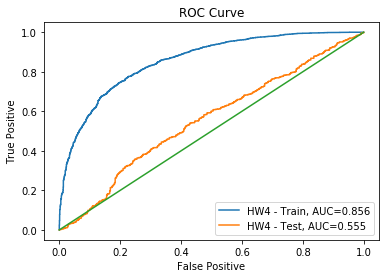

In [11]:
fpr_train, tpr_train, _ = metrics.roc_curve(response_train, y_pred_prob_train)
fpr_test, tpr_test, _ = metrics.roc_curve(response_test, y_pred_prob_test)
auc_train = round(metrics.roc_auc_score(response_train, y_pred_prob_train), 3)
auc_test = round(metrics.roc_auc_score(response_test, y_pred_prob_test), 3)
plt.plot(fpr_train, tpr_train, label='HW4 - Train, AUC='+str(auc_train))
plt.plot(fpr_test, tpr_test, label='HW4 - Test, AUC='+str(auc_test))
plt.legend(loc=4)

# For drawing a diagonal line y=x for reference
x = [0, 1]
y = [0, 1]
plt.plot(x, y)

plt.title("ROC Curve")
plt.xlabel("False Positive")
plt.ylabel("True Positive")

plt.show()

In [12]:
auc_dif = auc_train - auc_test
print(f'Difference is auc values is {round(auc_dif, 3)}')

Difference is auc values is 0.301


Now let's use Recursive Feature Elimination (RFE) to eliminate some less important features. 

We'll try taking the top 10 features.

Note - this took very long (around a day).

In [13]:
# Instantiate (create an instance of) the model (using the default parameters)
logreg_train = LogisticRegression(solver='liblinear', C=10.0, random_state=0, max_iter=8000)

rfe = RFE(logreg_train, 10)
fit = rfe.fit(predictor_train, response_train)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 10
Selected Features: [False False False False False False  True False False False False False
 False  True  True False False False False False False False False False
  True False False  True False False False False  True False False  True
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False  True False False False False
 False False False False False False False False False False False  True
 False False False  True False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False Fa

In [14]:
# Predict the probability
y_pred_prob_train_rfe = fit.predict_proba(predictor_train)[::, 1]    # this holds the probabilites for each training row
y_pred_prob_test_rfe = fit.predict_proba(predictor_test)[::, 1]      # using same model get probabilities for each testing row

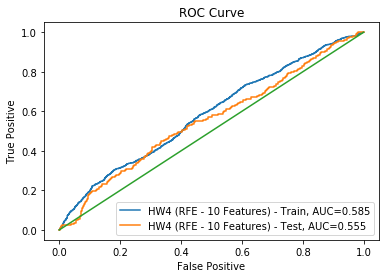

In [17]:
fpr_train, tpr_train, _ = metrics.roc_curve(response_train, y_pred_prob_train_rfe)
fpr_test, tpr_test, _ = metrics.roc_curve(response_test, y_pred_prob_test_rfe)
auc_train = round(metrics.roc_auc_score(response_train, y_pred_prob_train_rfe), 3)
auc_test = round(metrics.roc_auc_score(response_test, y_pred_prob_test_rfe), 3)
plt.plot(fpr_train, tpr_train, label='HW4 (RFE - 10 Features) - Train, AUC='+str(auc_train))
plt.plot(fpr_test, tpr_test, label='HW4 (RFE - 10 Features) - Test, AUC='+str(auc_test))
plt.legend(loc=4)

# For drawing a diagonal line y=x for reference
x = [0, 1]
y = [0, 1]
plt.plot(x, y)

plt.title("ROC Curve")
plt.xlabel("False Positive")
plt.ylabel("True Positive")

plt.show()

In [18]:
auc_dif = auc_train - auc_test
print(f'Difference is auc values is {round(auc_dif, 3)}')

Difference is auc values is 0.03


From what we can see here, the training did very well compared to the testing, which is good. Additionally, while these ROC curves are not super great, they are better than when it was done with just the top 3 features. In part 3 (HW 4 - 3) I try the top 10 features once again but this time with the original predictor matrix without calculating the daily change rate.